In [1]:
import numpy as np
import MDAnalysis as mda
import importlib
import XS_calc
from XS_calc import *

import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [35]:
importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc

In [247]:
importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc
U = mda.Universe('data/6lyz.pdb')
traj = Trajectory(U, selection='protein', match_FoXS=False)
frame = traj.Frames[0]
# print(frame.mol.vdW)
env = Environment(c2=2)
mea = Measurement(q = np.linspace(0.00, 0.5, num=101))
frame.SASA_calc(env, force_recalc=True)

FF_q = FF_calc(frame, env, mea)
XS = frame_XS_calc(frame, env, mea)
# an i by j matrix of distances between all atoms
# d_ij = np.sqrt(np.sum((frame.xyz[None,:,:]-frame.xyz[:,None,:])**2, axis=2))

# XS = np.zeros(np.shape(mea.q))
# for i in np.arange(frame.mol.n_atoms):
#     for j in np.arange(i+1, frame.mol.n_atoms):
#         qd = mea.q * d_ij[i,j]
#         XS += 2 * FF_q[i] * FF_q[j] * np.sinc(qd / np.pi)
#     XS += FF_q[i] ** 2

The protein has 1001 atoms


In [241]:
XS

array([27711.95257392, 27697.26215446, 27653.25376118, 27580.11556014,
       27478.15973407, 27347.82035437, 27189.65042743, 27004.31814068,
       26792.60234058, 26555.38728107, 26293.65668736, 26008.48718529,
       25701.04115211, 25372.55904862, 25024.35129722, 24657.78977345,
       24274.29898151, 23875.34698637, 23462.43617655, 23037.09393208,
       22600.86327252, 22155.29355899, 21701.93132277, 21242.31129114,
       20777.94767831, 20310.32580603, 19840.89411467, 19371.05662113,
       18902.16587509, 18435.51645992, 17972.33907888, 17513.79526125,
       17060.97271719, 16614.8813633 , 16176.450035  , 15746.52389481,
       15325.86253981, 14915.13880449, 14514.9382498 , 14125.75932252,
       13748.01416399, 13382.03004138, 13028.05137009, 12686.24229097,
       12356.6897622 , 12039.40712191, 11734.33807446, 11441.36105097,
       11160.2938924 , 10890.89880222, 10632.88751478, 10385.92662516,
       10149.64302642,  9923.6294012 ,  9707.44971564,  9500.64466538,
      

In [242]:

importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc

def frame_XS_calc_exp(frame, env, mea, ignoreSASA=False):
    q_sphere = raster_unit_sphere(200)
    
#     print(tmp)
#     print(sph)
    if not ignoreSASA:
        # Get the SASA calculated if not done
        frame.SASA_calc(env)

    # Calculate adjusted form factors as a table.
    FF_q = FF_calc(frame, env, mea)
    
    # Calculate scattering signal XS - currently this is quite slow. There has to be a way to make it faster
    XS = np.zeros(np.shape(mea.q))

    for idx, q in enumerate(mea.q):


            A = np.sum(FF_q[:,idx] * np.exp(-(1j) * q * np.dot(q_sphere, frame.xyz.T)), axis=1)
            XS[idx] = np.mean(np.abs(A)**2)
#         for q_pt in q_sphere:
#             A = np.sum(FF_q[:,idx] * np.exp(-(1j) * q * np.dot(q_pt, frame.xyz.T)))
#             print((FF_q[:,idx] * np.exp(-(1j) * q * np.dot(q_pt, frame.xyz.T))).shape)
#             XS[idx] += np.abs(A)**2 / len(q_sphere)

#             A = 0
#             for i in np.arange(frame.mol.n_atoms):
#                 A += FF_q[i][idx] * np.exp(-(1j) * q * np.dot(q_pt, frame.xyz[i]))
#             XS[idx] += np.abs(A)**2 / len(q_sphere)

    return XS

In [243]:
FF_q.shape

(104, 101)

In [248]:
%timeit XS = frame_XS_calc(frame, env, mea)

5.99 s ± 57.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [249]:
%timeit XS2 = frame_XS_calc_exp(frame, env, mea) 
print(XS2)

541 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[27711.95257392 27697.26089129 27653.24870728 27580.1041842
 27478.13949864 27347.78871343 27189.60482408 27004.25600493
 26792.52108721 26555.28430768 26293.52937253 26008.33288695
 25700.85720603 25372.34276719 25024.09996842 24657.50066001
 24273.96932038 23874.97398847 23462.01702672 23036.62578936
 22600.34327077 22154.71880773 21701.29890839 21241.61827842
 20777.19111223 20309.50271398 19840.00150888 19370.09150153
 18901.12523243 18434.39727926 17971.13834332 17512.50995608
 17059.59983427 16613.41790577 16174.89302224 15744.87036776
 15324.10956643 14913.2834856  14512.97772504 14123.69077661
 13745.83483315 13379.73721995 13025.64241729 12683.71463783
 12354.04091858 12036.63468364 11731.43973052 11438.33459078
 11157.13721306 10887.60991582 10629.46455562 10382.36785694
 10145.94684939  9919.79435916  9703.4745028   9496.52813308
  9298.47818914  9108.83490548  8927.10083761  8752.77566562
  8585.36074018  8

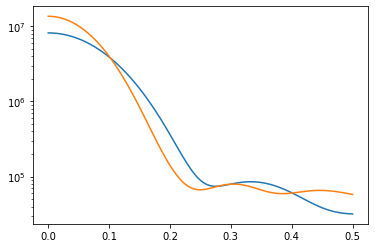

In [239]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(mea.q, XS)
plt.plot(mea.q, XS2)
plt.yscale('log')